# Building a Pivot Table using Pandas in Python

Pivot tables are important because they allow anyone to filter and extract significance about the data set they are working with. Pivot tables allow anyone to look at their data in a number of ways and perspectives.

### 1. Exploring the Titanic Dataset using Pandas in Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6
plt.style.use('ggplot')

Let's import titanic dataset

In [2]:
df = pd.read_csv('train.csv')
df.head() # displaying first five values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dropping a few features to make it easier to analyze the data using pivot_table function

In [3]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## 2. Building a Pivot Table using Pandas

### Group data using index in a pivot table

- **A single index**

In [4]:
# Using Sex column as index

table1 = pd.pivot_table(data=df,index=['Sex'])
table1

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


We can instantly compare all the feature values for both the genders.<p> Visualizing the findings:

<AxesSubplot:xlabel='Sex'>

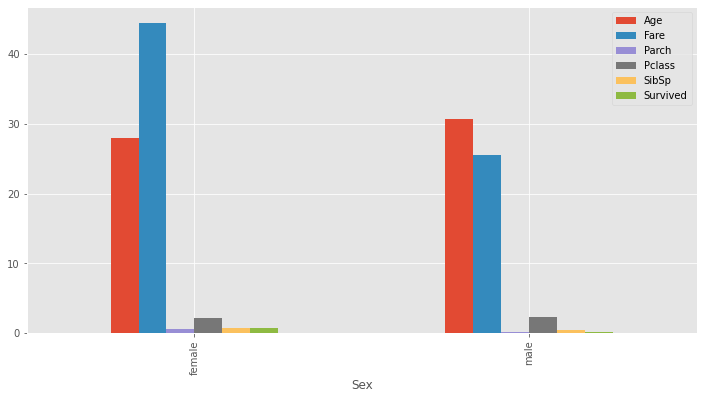

In [5]:
table1.plot(kind='bar')

- **Multiple index index**

In [6]:
# multiple indexes

table2 = pd.pivot_table(df,index=['Sex','Pclass'])
table2

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

### Different aggregation function for different features

aggfunc is an aggregate function that pivot_table applies to your grouped data

Using np.mean() for the ‘Age’ feature and np.sum() for the ‘Survived’ feature;

In [7]:
# different aggregate functions

table3 = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table3

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

### Aggregate on specific features with values parameter

values parameter is where you tell the function which features to aggregate on

In [8]:
table4 = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table4

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

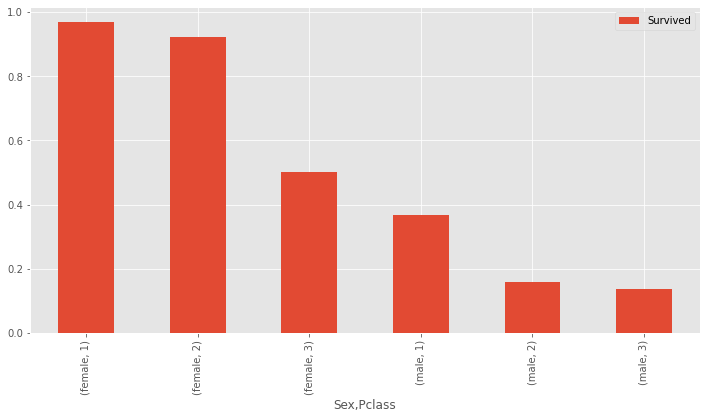

In [9]:
table4.plot(kind='bar');

Findings: The survival rate of passengers aboard the Titanic decreased with a degrading Pclass among both the genders. Moreover, the survival rate of male passengers was lower than the female passengers in any given Pclass.

### Find the relationship between features with columns parameter

*columns* parameter is optional and displays the values horizontally on the top of the resultant table.

In [10]:
#columns

table5 = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table5

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

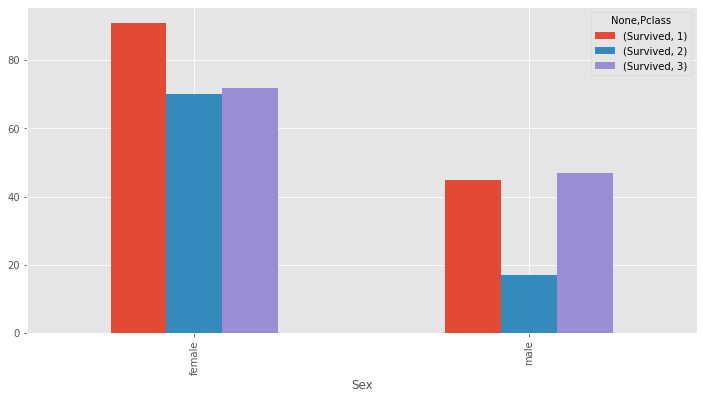

In [11]:
table5.plot(kind='bar');

### Handling missing data

pivot_table even allows you to deal with the missing values through the parameters dropna and fill_value:

In [12]:
# display null values

table6 = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table6

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

Replacing the NaN values with the mean value from the ‘Age’ column:

In [13]:
#handling null values

table7 = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table7

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333